# Demo for EA project experiments 

## The runs in this notebook are not optimal and do not represent the best possible results of the provided algorithms. This is just to test and demonstrate the experimental setup.

In [2]:
from PIL import Image
from vangogh.evolution import Evolution
from vangogh.fitness import draw_voronoi_image
from vangogh.experiment_module.experiment import Experiment
from vangogh.experiment_module.experiment import compare_experiments
from vangogh.util import IMAGE_SHRINK_SCALE, REFERENCE_IMAGE
from IPython.display import display, clear_output
import numpy as np
import pandas as pd
import cma
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from mpl_toolkits.axes_grid1 import ImageGrid
plt.style.use('classic')
%matplotlib inline

from multiprocess import Pool, cpu_count

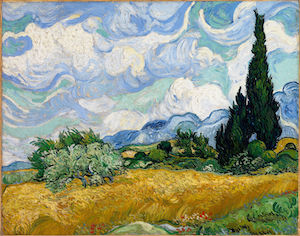

In [3]:
display(REFERENCE_IMAGE)

In [4]:
# Enable to show live rendering of best individual during optimization
display_output = False
# Enable to save progress images at every 50th generation
save_progress = True
# Enable to print verbose output per generation
verbose_output = False

In [5]:
def reporter(time, evo):
    if save_progress or display_output:
        elite = draw_voronoi_image(evo.elite, evo.reference_image.width, evo.reference_image.height, scale=IMAGE_SHRINK_SCALE)
    if display_output:
        clear_output()
        display(elite)
    if save_progress and time["num-generations"] % 50 == 0:
        elite.save(f"./img/van_gogh_intermediate_{evo.seed}_{evo.population_size}_{evo.crossover_method}_{evo.num_points}_{evo.initialization}_{evo.generation_budget}_{time['num-generations']:05d}.png")


## Classic Example

### Tournament size 4

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F2D6F7019F0>
 - Evolution Type: p+o
 - Population Size: 160
 - Generation Budget: 25
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f2ddfe49870>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 100597
Total Runtime 9.78 sec

Run #2
Elite fitness 97621
Total Runtime 9.74 sec

Run #3
Elite fitness 110546
Total Runtime 9.74 sec

Run #4
Elite fitness 102268
Total Runtime 9.83 sec

Run #5
Elite fitness 103157
Total Runtime 9.8 sec

Run #6
Elite fitness 99071
Total Runtime 9.98 sec

Run #7
Elite fitness 10166

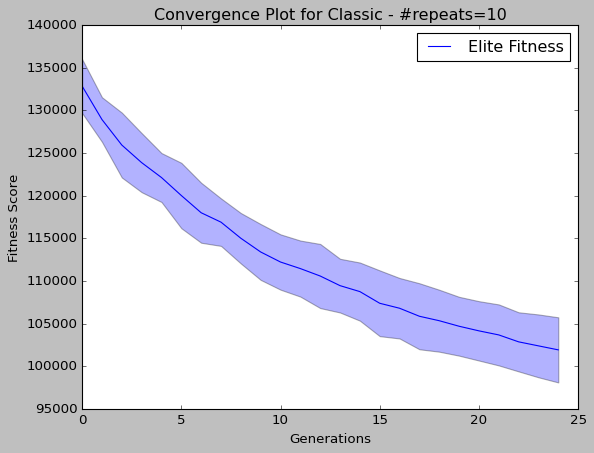

In [5]:
evo = Evolution(100,
                    REFERENCE_IMAGE,
                    population_size=160,
                    generation_reporter=reporter,
                    crossover_method="ONE_POINT",
                    seed=10,
                    initialization="RANDOM",
                    generation_budget=25,
                    num_features_mutation_strength=.25,
                    selection_name='tournament_4',
                    verbose=verbose_output)

experiment_classic = Experiment("Classic", evo)

results_1 = experiment_classic.run_experiment(repeats=10, plot_converge=True, mode="generation")

### Tournament size 8

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F2D6F7A7550>
 - Evolution Type: p+o
 - Population Size: 160
 - Generation Budget: 25
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_8
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f2ddfe49870>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 102362
Total Runtime 10.09 sec

Run #2
Elite fitness 107211
Total Runtime 9.91 sec

Run #3
Elite fitness 107817
Total Runtime 9.78 sec

Run #4
Elite fitness 99598
Total Runtime 9.95 sec

Run #5
Elite fitness 102282
Total Runtime 9.78 sec

Run #6
Elite fitness 105037
Total Runtime 9.71 sec

Run #7
Elite fitness 10

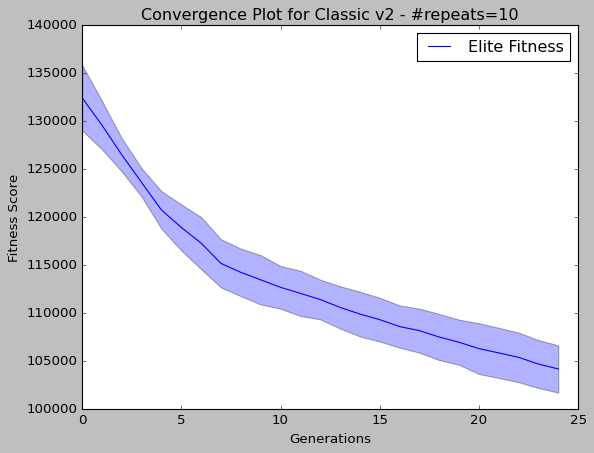

In [6]:
evo = Evolution(100,
                    REFERENCE_IMAGE,
                    population_size=160,
                    generation_reporter=reporter,
                    crossover_method="ONE_POINT",
                    seed=10,
                    initialization="RANDOM",
                    generation_budget=25,
                    num_features_mutation_strength=.25,
                    selection_name='tournament_8',
                    verbose=verbose_output)

experiment_classic_2 = Experiment("Classic v2", evo)

results_2 = experiment_classic_2.run_experiment(repeats=10, plot_converge=True, mode="generation")

### Compare the 2 different evolution experiments

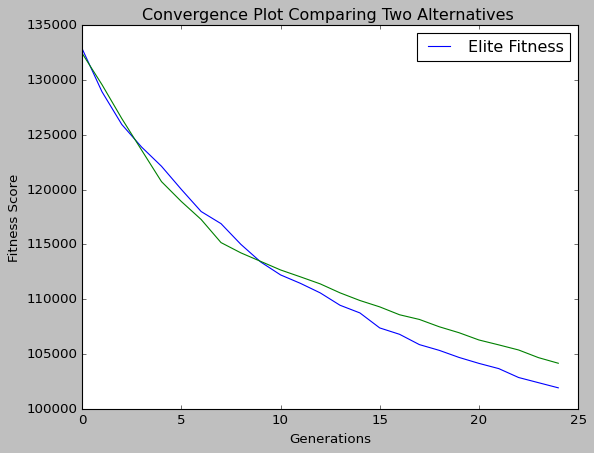

Null hypothesis rejected with p-value of 0.005578815937042236


In [15]:
alpha = 0.05
p_value, significance_result = compare_experiments(results_1, results_2, alpha, plot=True, test="wilcoxon")
print(f"{significance_result} with p-value of {p_value}")

### Hyperparameter study for selection methods and population

Running new experiment: Classic_population_size_16_selection_name_tournament_4_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F0310F4BA00>
 - Evolution Type: p+o
 - Population Size: 16
 - Generation Budget: 25
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f0310f6ce50>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 119094
Total Runtime 5.44 sec

Run #2
Elite fitness 127649
Total Runtime 5.37 sec

Average Elite Fitness over 2 runs: 123371.5


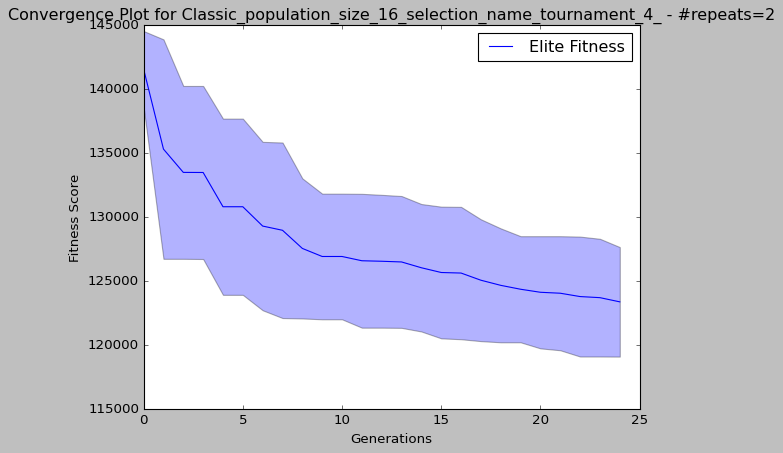

Running new experiment: Classic_population_size_16_selection_name_tournament_8_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F0310F4BA00>
 - Evolution Type: p+o
 - Population Size: 16
 - Generation Budget: 25
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_8
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f0310f6ce50>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 127817
Total Runtime 5.33 sec

Run #2
Elite fitness 120594
Total Runtime 5.27 sec

Average Elite Fitness over 2 runs: 124205.5


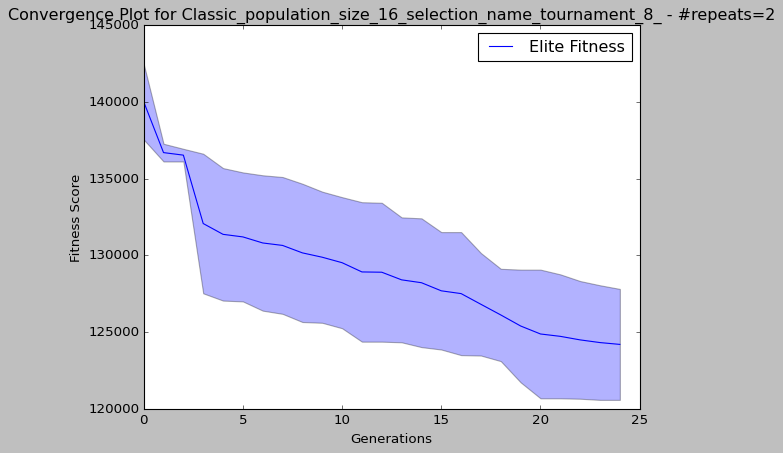

Running new experiment: Classic_population_size_32_selection_name_tournament_4_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F0310F4BA00>
 - Evolution Type: p+o
 - Population Size: 32
 - Generation Budget: 25
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f0310f6ce50>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 122696
Total Runtime 5.88 sec

Run #2
Elite fitness 120713
Total Runtime 5.96 sec

Average Elite Fitness over 2 runs: 121704.5


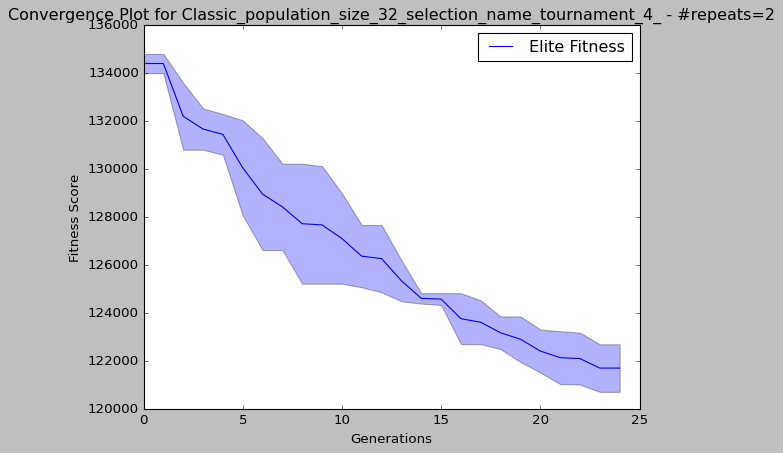

Running new experiment: Classic_population_size_32_selection_name_tournament_8_

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F0310F4BA00>
 - Evolution Type: p+o
 - Population Size: 32
 - Generation Budget: 25
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_8
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f0310f6ce50>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 116641
Total Runtime 5.84 sec

Run #2
Elite fitness 118050
Total Runtime 6.0 sec

Average Elite Fitness over 2 runs: 117345.5


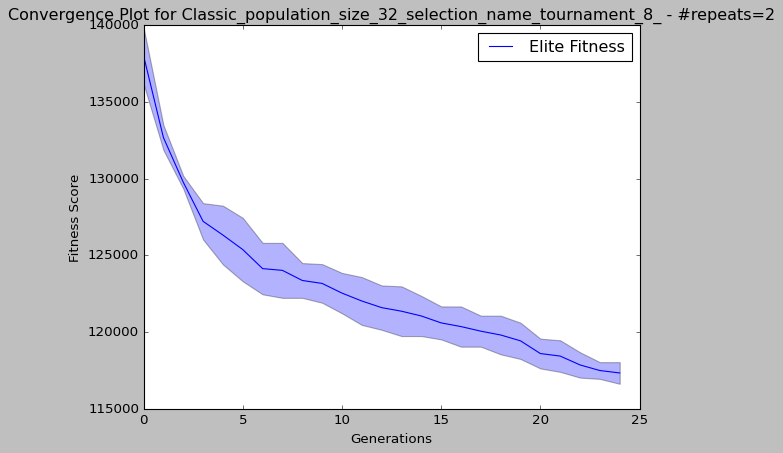

Best hyperparameters found: Classic_population_size_32_selection_name_tournament_8_ with score 117345.5


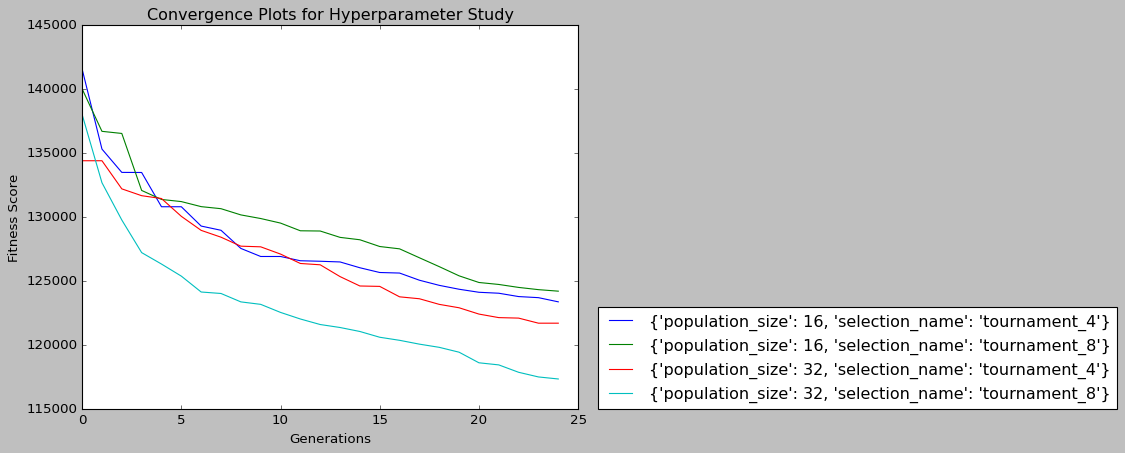

In [6]:
evo = Evolution(100,
                    REFERENCE_IMAGE,
                    generation_reporter=reporter,
                    crossover_method="ONE_POINT",
                    seed=10,
                    initialization="RANDOM",
                    generation_budget=25,
                    verbose=verbose_output)

experiment_classic_hs = Experiment("Classic", evo)

params = {
    'population_size': [16, 32],
    'selection_name': ['tournament_4', 'tournament_8']
}

data = experiment_classic_hs.hyperparameter_search(params, repeats=2, plot_converge=True, plot=True)


## UMDA

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F03745B27D0>
 - Evolution Type: UMDA
 - Population Size: 300
 - Generation Budget: 200
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f0310f6ce50>
 - Learning Rate: 0.1
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 48154
Total Runtime 128.56 sec

Average Elite Fitness over 1 runs: 48154.0


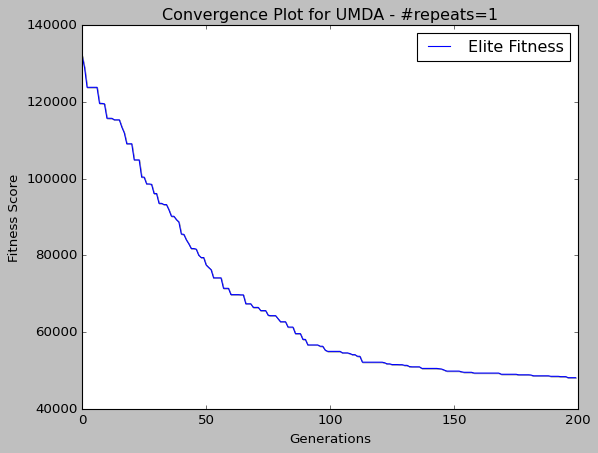

array([132059., 128803., 123773., 123773., 123773., 123773., 123773.,
       119587., 119587., 119466., 115720., 115696., 115696., 115299.,
       115299., 115299., 113427., 111911., 109065., 109065., 109065.,
       104864., 104864., 104864., 100390., 100390.,  98605.,  98605.,
        98511.,  96114.,  96114.,  93557.,  93557.,  93237.,  93237.,
        91867.,  90193.,  90193.,  89324.,  88710.,  85549.,  85484.,
        84075.,  83033.,  81785.,  81785.,  81632.,  80058.,  79439.,
        79439.,  77515.,  76870.,  76281.,  74148.,  74148.,  74148.,
        74148.,  71429.,  71429.,  71429.,  69782.,  69782.,  69782.,
        69782.,  69721.,  69721.,  67394.,  67394.,  67394.,  66459.,
        66459.,  66459.,  65621.,  65621.,  65621.,  64415.,  64307.,
        64307.,  64307.,  63500.,  62717.,  62717.,  62717.,  61334.,
        61334.,  61334.,  59627.,  59627.,  59627.,  58129.,  58129.,
        56678.,  56678.,  56678.,  56678.,  56678.,  56344.,  56344.,
        55338.,  550

In [7]:
evo = Evolution(100,
                REFERENCE_IMAGE,
                evolution_type="UMDA",
                population_size=300,
                generation_reporter=reporter,
                crossover_method="ONE_POINT",
                seed=10,
                initialization="RANDOM",
                generation_budget=200,
                num_features_mutation_strength=.25,
                selection_name='tournament_4',
                verbose=verbose_output)

experiment_umda = Experiment("UMDA", evo)

umda_results = experiment_umda.run_experiment(repeats=1, plot_converge=True, mode="generation")

## PBIL

Experiment Settings:
 - Number of Points: 100
 - Reference Image: <PIL.Image.Image image mode=RGB size=50x39 at 0x7F03538D8970>
 - Evolution Type: PBIL
 - Population Size: 300
 - Generation Budget: 200
 - Evaluation Budget: -1
 - Crossover Method: ONE_POINT
 - Mutation Probability: 0.002
 - Num Features Mutation Strength: 0.25
 - Num Features Mutation Strength Decay: None
 - Num Features Mutation Strength Decay Generations: None
 - Selection Name: tournament_4
 - Initialization: RANDOM
 - Noisy Evaluations: False
 - Verbose: False
 - Generation Reporter: <function reporter at 0x7f0310f6ce50>
 - Learning Rate: 0.5
 - Negative Learning Rate: 0.075
 - Seed: 10

Run #1
Elite fitness 116333
Total Runtime 151.12 sec

Average Elite Fitness over 1 runs: 116333.0


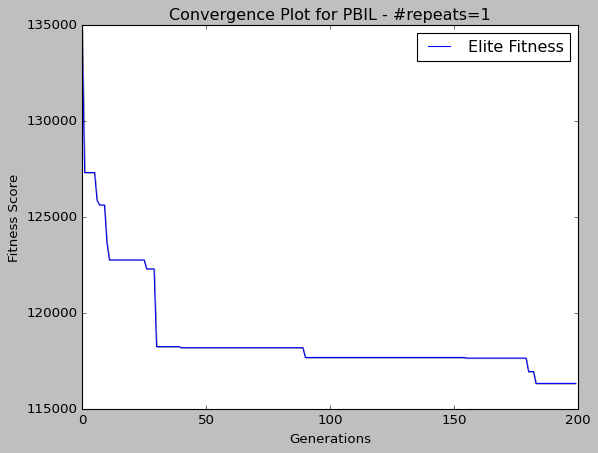

array([134869., 127317., 127317., 127317., 127317., 127317., 125877.,
       125624., 125624., 125624., 123657., 122763., 122763., 122763.,
       122763., 122763., 122763., 122763., 122763., 122763., 122763.,
       122763., 122763., 122763., 122763., 122763., 122297., 122297.,
       122297., 122297., 118250., 118250., 118250., 118250., 118250.,
       118250., 118250., 118250., 118250., 118250., 118193., 118193.,
       118193., 118193., 118193., 118193., 118193., 118193., 118193.,
       118193., 118193., 118193., 118193., 118193., 118193., 118193.,
       118193., 118193., 118193., 118193., 118193., 118193., 118193.,
       118193., 118193., 118193., 118193., 118193., 118193., 118193.,
       118193., 118193., 118193., 118193., 118193., 118193., 118193.,
       118193., 118193., 118193., 118193., 118193., 118193., 118193.,
       118193., 118193., 118193., 118193., 118193., 118193., 117685.,
       117685., 117685., 117685., 117685., 117685., 117685., 117685.,
       117685., 1176

In [8]:
evo = Evolution(100,
                REFERENCE_IMAGE,
                evolution_type="PBIL",
                population_size=300,
                generation_reporter=reporter,
                crossover_method="ONE_POINT",
                seed=10,
                initialization="RANDOM",
                generation_budget=200,
                num_features_mutation_strength=.25,
                selection_name='tournament_4',
                verbose=verbose_output,
                learning_rate=0.5)

experiment_pbil = Experiment("PBIL", evo)

pbil_results = experiment_pbil.run_experiment(repeats=1, plot_converge=True, mode="generation")